### Data Description:
* The data at hand contains medical costs of people characterized by certain attributes.
### Domain:
* Healthcare
### Context:
* Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
### Attribute Information:
* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance.
### Learning Outcomes:
* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing
### Objective:
* We want to see if we can dive deep into this data to find some valuable insights.

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [ ]:
data = pd.read_csv("insurance.csv")

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Information about tthe dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Descriptive analysis of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# Check for the presence of null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
cat_col =  data.select_dtypes(include="O").columns
num_col = data.select_dtypes(exclude="O").columns

### Data visualizaton

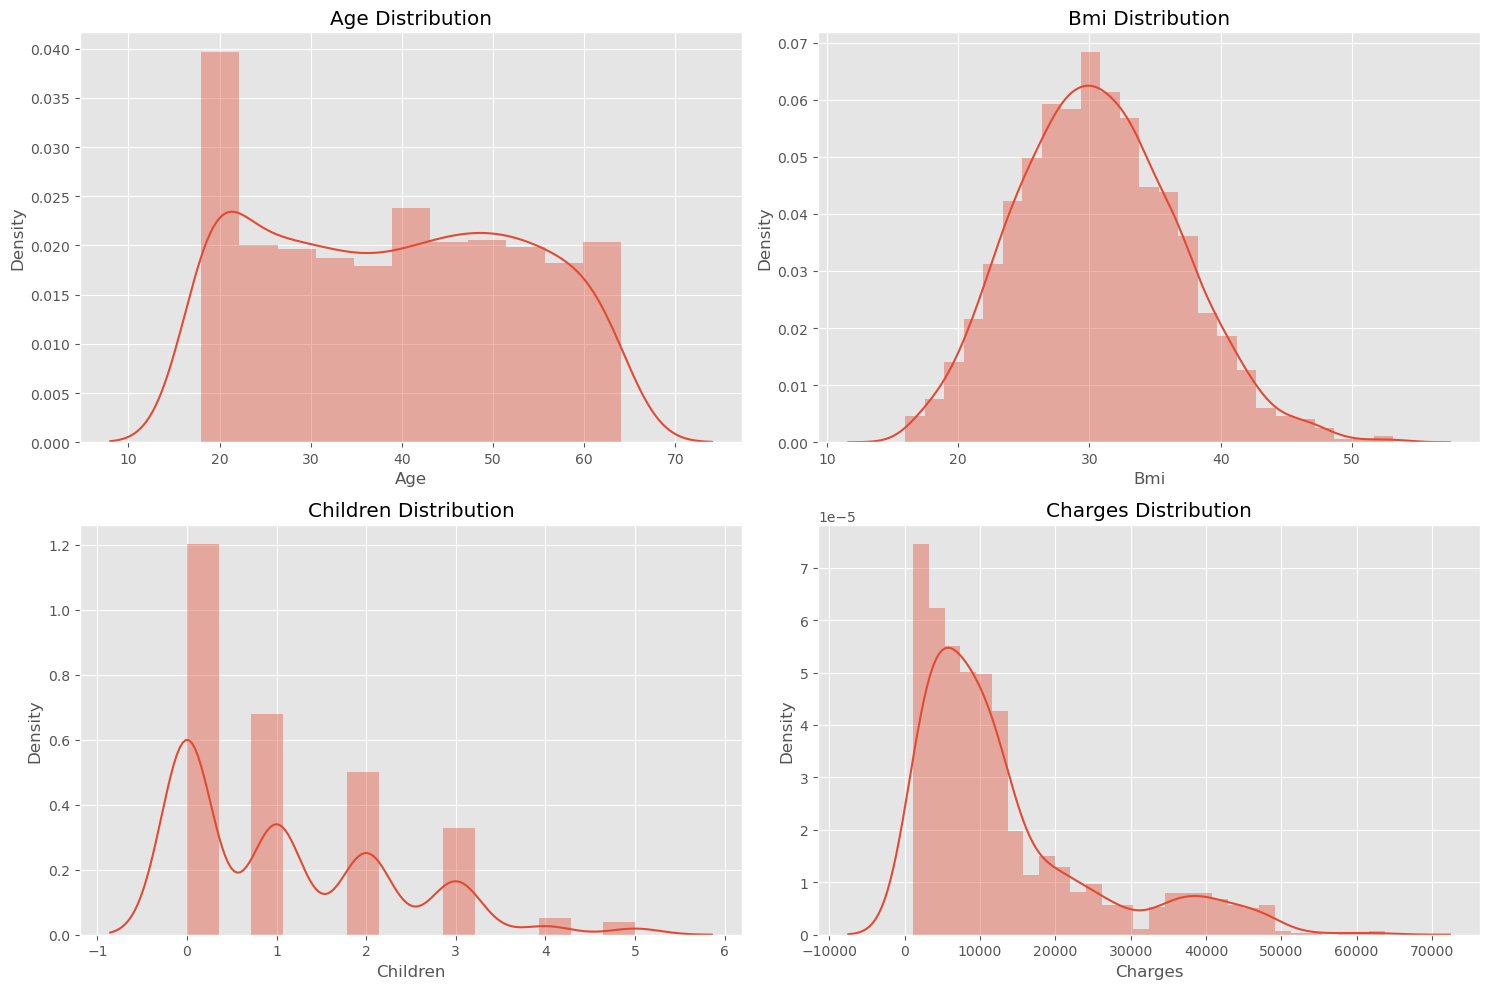

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(num_col):
    distplot = sns.distplot(data[col], ax=axes[idx])
    distplot.set_title(col.title()+" Distribution")
    distplot.set_xlabel(col.title())
    distplot.set_ylabel("Density")

plt.tight_layout()
plt.show()

In [ ]:
# Measure the skewness level

pd.DataFrame(data.select_dtypes(exclude="O").skew(), columns=["Skewness"]).T

,age,bmi,children,charges
Skewness,0.055673,0.284047,0.93838,1.51588


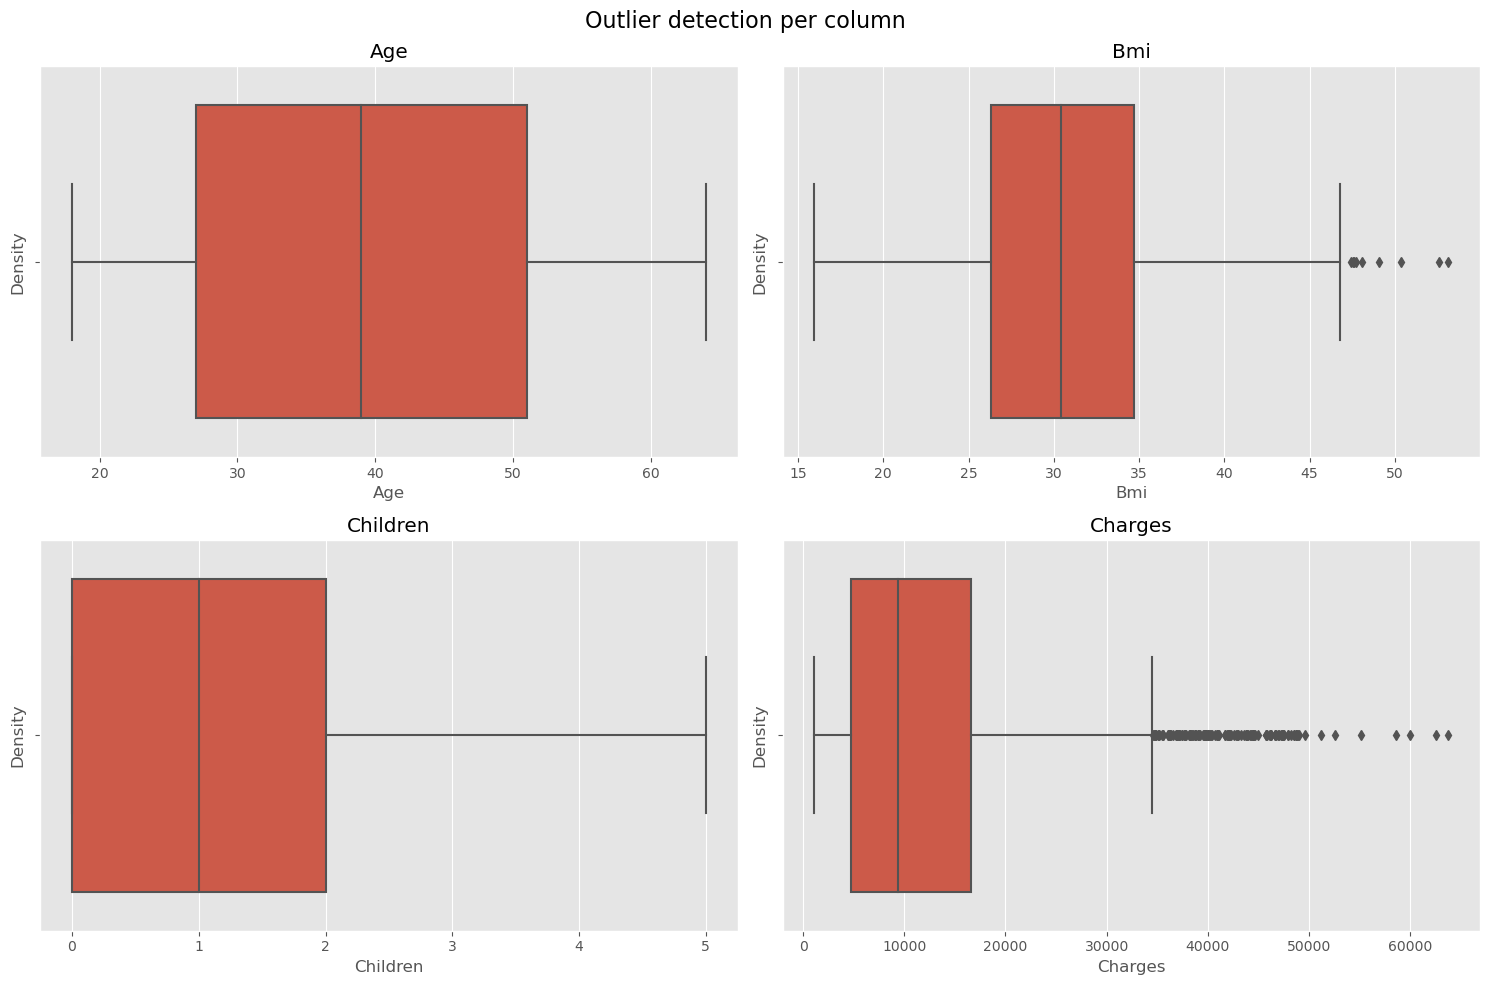

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(num_col):
    boxplot = sns.boxplot(x=data[col], ax=axes[idx])
    boxplot.set_title(col.title())
    boxplot.set_xlabel(col.title())
    boxplot.set_ylabel("Density")

fig.suptitle("Outlier detection per column", fontsize=16)
plt.tight_layout()
plt.show()

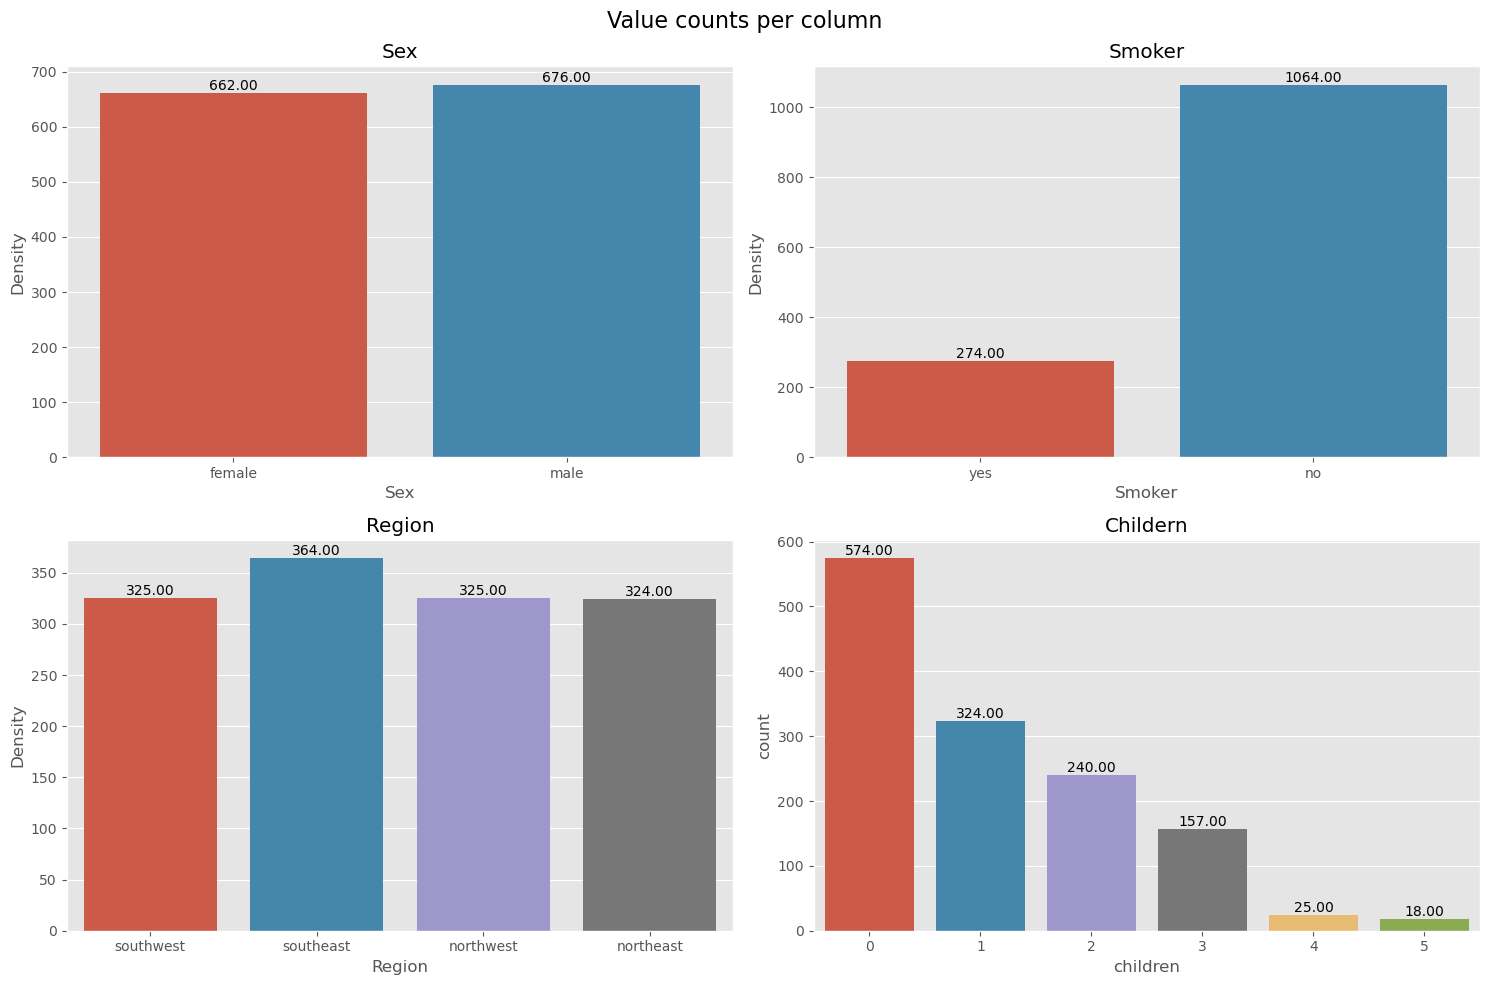

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(cat_col):
    countplot = sns.countplot(data=data, x=col, ax=axes[idx])
    countplot.set_title(col.title())
    countplot.set_xlabel(col.title())
    countplot.set_ylabel("Density")

    # Add the values at the top of the barplot
    for p in countplot.patches:
        h = p.get_height()
        countplot.text(p.get_x()+(p.get_width()/2), h, f"{h:.2f}", ha="center", va="bottom")

children_countplot = sns.countplot(data=data, x="children", ax=axes[-1])
children_countplot.set_title("Childern")
# Add the values at the top of the barplot
for p in children_countplot.patches:
    h = p.get_height()
    children_countplot.text(p.get_x()+(p.get_width()/2), h, f"{h:.2f}", ha="center", va="bottom")

fig.suptitle("Value counts per column", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
prep_data = data.copy()

for col in cat_col:
    prep_data[col] = LabelEncoder().fit_transform(prep_data[col])

prep_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 1000x500 with 0 Axes>

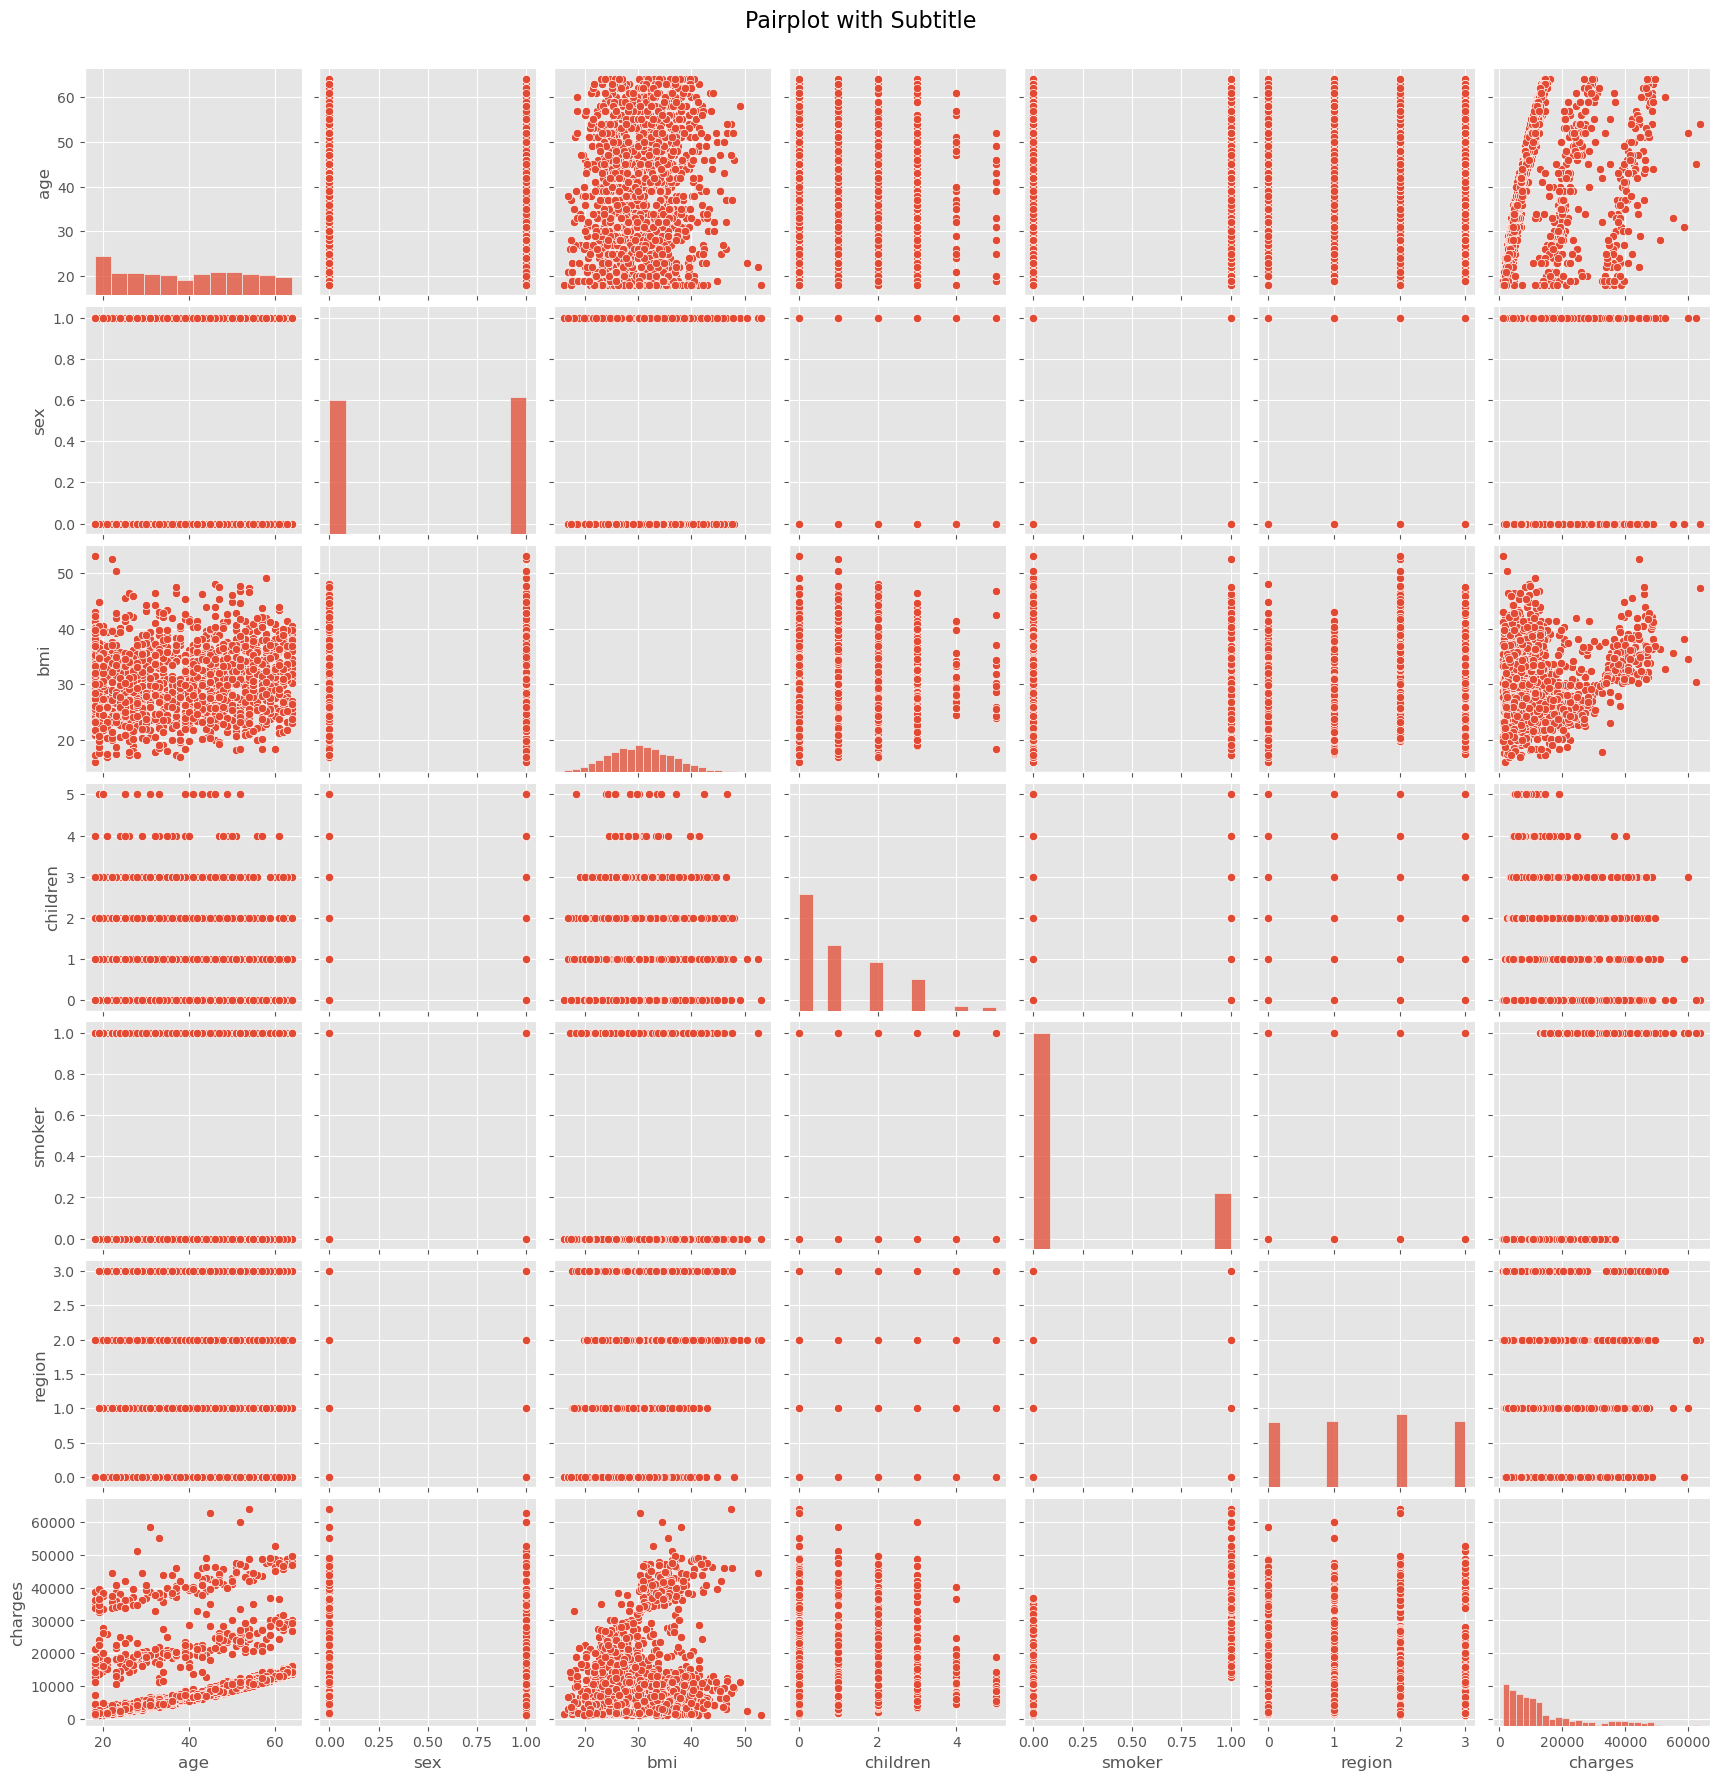

In [ ]:
plt.figure(figsize=(10, 5))

sns.pairplot(prep_data)

plt.suptitle("Pairplot with Subtitle", fontsize=16, y=1.02)

plt.show()

### Answer the following questions with statistical evidence
* Do charges of people who smoke differ significantly from the people who don't?
* Does bmi of males differ significantly from that of females?
* Is the proportion of smokers significantly different in different genders?
* Is the distribution of bmi across women with no children, one child and two children, the same?

In [ ]:
smokers = data[data['smoker'] == "yes"]['charges']
non_smokers = data[data['smoker'] == "no"]['charges']

t, p_value = ttest_ind(smokers, non_smokers)

confidence_level = 0.05 # Set the confidence interval to 5%

if p_value < confidence_level:
    print(f"P-value: {p_value:.4f} | There's is a significant difference in the charge of those who smokes from those who don't.")
else:
    print(f"P-value: {p_value:.4f} | There's is no significant difference in the charge of those who smokes from those who don't.")

P-value: 0.0000 | There's is a significant difference in the charge of those who smokes from those who don't.


In [ ]:
male_bmi = data[data["sex"] == "male"]["bmi"]
female_bmi = data[data["sex"] == "female"]["bmi"]

t, p_value = ttest_ind(male_bmi, female_bmi)

if p_value < confidence_level:
    print(f"P-value: {p_value:.4f} | There is a significant difference in BMI between males and females.")
else:
    print(f"P-value: {p_value:.4f} | There is no significant difference in BMI between males and females.")

P-value: 0.0900 | There is no significant difference in BMI between males and females.


In [ ]:
gender = data["sex"]
smoker = data["smoker"]

crosstab = pd.crosstab(smoker, gender)

statistic, p_value, dof, expected_freq =  chi2_contingency(crosstab) # We use chi-test for categorical data

if p_value < confidence_level:
    print(f"P-value: {p_value:.4f} | The proportion of smokers significantly differ in different gender.")
else:
    print(f"P-value: {p_value:.4f} | The proportion of smokers does not significantly differ in different gender.")

P-value: 0.0065 | The proportion of smokers significantly differ in different gender.


In [ ]:
one_child = data[(data["sex"] == "female") & (data["children"] == 0)]["bmi"]
two_child = data[(data["sex"] == "female") & (data["children"] == 1)]["bmi"]
three_child = data[(data["sex"] == "female") & (data["children"] == 2)]["bmi"]

t, p_value = f_oneway(one_child, two_child, three_child) # This is used to check if there's any relative difference between the mean of three groups

if p_value < confidence_level:
    print(f"P-value: {p_value:.4f} | There is a significant difference in BMI among groups.")
else:
    print(f"P-value: {p_value:.4f} | There is no significant difference in BMI among groups.")

P-value: 0.7159 | There is no significant difference in BMI among groups.
